# <span style="color: hotpink">Project 3: Regression
### <span style="color: hotpink">Fabiola Rojas</span>
---

## <span style="color: hotpink">The Problem</span> 

In today’s rapidly evolving job market, understanding salary trends is crucial for both employers and employees. Data engineering is a high-demand field, and salaries can vary significantly based on factors such as experience level, job title, employment type, company location, and remote work options. This project is particularly important to me as I am soon starting a data engineering position myself. Understanding salary trends and the factors that influence compensation will not only help me navigate my own career but also provide valuable insights for others entering the field. The goal of this project is to build a regression model that predicts salaries in USD based on these attributes. 

---

## <span style="color: hotpink">The Data

For this project, I am using the [Data Engineer Salary in 2024 dataset](https://www.kaggle.com/datasets/chopper53/data-engineer-salary-in-2024/data) from Kaggle, which provides salary information in both local currency and standardized USD. The dataset contains key employment attributes, including:  

- Experience level (Entry-Level, Mid-Level, Senior Engineer)
- Employment type (Full-time, Part-time, Contract, Freelance)
- Job title (e.g., AI Engineer, Big Data Engineer)
- Remote work ratio (0%, 50%, 100% remote)
- Company size (Small, Medium, Large)
- Company and employee location

---

## <span style="color: hotpink">What is regression and how does it work?


Regression is a supervised learning technique used for predicting continuous numerical values based on input features. It helps establish relationships between independent variables (predictors) and a dependent variable (target).

One of the most commonly used regression methods is linear regression, which assumes a linear relationship between the independent variables and the target variable. The equation for a simple linear regression model is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon
$$

where:

- $y$ is the predicted salary (dependent variable).
- $x_1, x_2, ..., x_n$ are the independent variables (e.g., experience level, job title).
- $\beta_0$ is the intercept (the predicted value when all features are zero).
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients that determine the impact of each feature.
- $\epsilon$ is the error term (residual), representing the difference between actual and predicted values.  

Linear regression finds the best-fitting line by minimizing the sum of squared residuals—the differences between actual and predicted values. The two most common approaches to estimate the coefficients $\beta$ are Ordinary Least Squares (OLS) and Gradient Descent. OLS directly computes the optimal coefficients by minimizing the sum of squared residuals. Gradient Descent is an optimization technique that minimizes the cost function by iteratively updating the coefficients.

---


## <span style="color: hotpink">Data Understanding and Pre-Processing

<span style="color: purple">Let's start working with the dataset.

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("/Users/fabiolarojas/Documents/itcs3162/salaries (2) 2.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<span style="color: purple">I won't be needing the unstandardized salary column or the salary currency column, so I'll drop these and rename the USD salary column to simplify things a little bit.

In [12]:
df = df.drop(['salary', 'salary_currency'], axis=1)
df = df.rename(columns={'salary_in_usd':'salary_usd'})
df.head()

,work_year,experience_level,employment_type,job_title,salary_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary_usd          16534 non-null  int64 
 5   employee_residence  16534 non-null  object
 6   remote_ratio        16534 non-null  int64 
 7   company_location    16534 non-null  object
 8   company_size        16534 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


<span style="color: purple">There are no nulls so we won't have to do any extra work here.

In [15]:
df.duplicated().sum()

np.int64(6422)

<span style="color: purple">There are 6,422 duplicate rows which account for over 1/3 of the data. This could definitely be a problem, seeing as I don't find it very likely that these are legitimate repeats given the amount of unique salary and job title values there are just in the preview of the data. This is probably an error in the data entry and it is best to remove the duplicates to avoid overrepresentation of certain categories that could skew the results.

In [17]:
df = df.drop_duplicates()
df.shape

(10112, 9)

<span style="color: purple">The dataset is now down to 10,112 rows. Let's view the counts for each class in our features.

In [19]:
features = df.drop(columns=['salary_usd'])
for col in features:
    print(df[col].value_counts())
    print()

work_year
2023    4632
2024    4073
2022    1116
2021     216
2020      75
Name: count, dtype: int64

experience_level
SE    5950
MI    2761
EN    1010
EX     391
Name: count, dtype: int64

employment_type
FT    10032
PT       38
CT       28
FL       14
Name: count, dtype: int64

job_title
Data Engineer                1842
Data Scientist               1835
Data Analyst                 1383
Machine Learning Engineer     945
Analytics Engineer            354
                             ... 
BI Data Engineer                1
Marketing Data Engineer         1
Data Science Tech Lead          1
Principal Data Architect        1
Cloud Data Architect            1
Name: count, Length: 155, dtype: int64

employee_residence
US    8326
GB     533
CA     402
DE      97
ES      78
      ... 
IQ       1
BG       1
JE       1
RS       1
LU       1
Name: count, Length: 88, dtype: int64

remote_ratio
0      6393
100    3472
50      247
Name: count, dtype: int64

company_location
US    8377
GB     541
C

<span style="color: purple">There are a few things to note after viewing the value counts:  
- <span style="color: purple">Most of the data comes from work years 2023 and 2024. Since it's pretty recent we should have pretty accurate data for predicting salaries.  
- <span style="color: purple">There is a fourth class for experience_level that was not defined in the dataset description: 'EX'. It's possible that it means Executive. We can make this assumption and not worry too much about the effects on the model as it is the least-represented class.  
- <span style="color: purple">Most of the employment types are full-time, and this is okay because other employment types for this kind of career are pretty unheard of anyway.  
- <span style="color: purple">Job title gets tricky because there are 155 unique values. The most common are data engineer, data scientist, data analyst, and machine learning engineer. There are lots of different titles for similar jobs and it is unclear the best way to encode this feature.  
- <span style="color: purple">The most common employee residence and company location is the US, followed by Great Britain, Canada, and 85 other countries. I will group these other countries together as "other."  
- <span style="color: purple">Most jobs are fully onsite, about a third are fully remote, and few are hybrid.  
- <span style="color: purple">Most companies are medium sized, some are large, and few are small.  


In [21]:
value_counts = df['job_title'].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.head(20)


,job_title,count
0,Data Engineer,1842
1,Data Scientist,1835
2,Data Analyst,1383
3,Machine Learning Engineer,945
4,Analytics Engineer,354
5,Research Scientist,320
6,Data Architect,283
7,Research Engineer,218
8,Data Science,206
9,ML Engineer,172


<span style="color: purple">Above is an expanded view of some of the most common values for job_title. Some common major categories could be engineer, analyst, scientist, manager, but it may not make sense to group them in this way. I'm not sure the difference in the roles of a data analyst and a research analyst, if any, but grouping them on the basis that they're both 'analysts' may be inaccurate. I will have to do some extra research on these job titles to find the best way to group them. I don't want to have to go through all 155 values, so I will try to focus on the most common classes. The first 13 account for nearly 80% of the data, so I will try to consolidate these. I will leave this for later on in the modeling in case simpler models don't perform well enough.

<span style="color: purple">I'll go ahead and reduce the cardinality of employee_residence and company_location by labeling all countries not in ['US', 'GB', 'CA'] as 'Other'.

In [24]:
top_countries = ['US', 'GB', 'CA']

df.loc[:, 'employee_residence'] = df['employee_residence'].apply(
    lambda x: x if x in top_countries else 'Other'
)

df.loc[:, 'company_location'] = df['company_location'].apply(
    lambda x: x if x in top_countries else 'Other'
)

print(df['employee_residence'].value_counts())

print(df['company_location'].value_counts())

employee_residence
US       8326
Other     851
GB        533
CA        402
Name: count, dtype: int64
company_location
US       8377
Other     790
GB        541
CA        404
Name: count, dtype: int64


## <span style="color: hotpink">Visualizations

<span style="color: purple">Before moving on to encoding, let's see what insights we can gain from visualizations.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#### <span style="color: hotpink">**Salary Distribution**

<Axes: xlabel='salary_usd', ylabel='Count'>

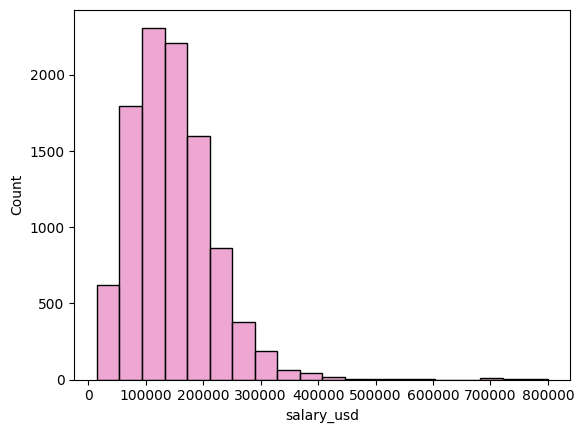

In [29]:
sns.histplot(df['salary_usd'], bins=20, color='#e78ac3')

<span style="color: purple">It looks like the target column has some outliers. Let's see how many there are and if it makes sense to remove them.

In [31]:
Q1 = df['salary_usd'].quantile(0.25)
Q3 = df['salary_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary_usd'] < lower_bound) | (df['salary_usd'] > upper_bound)]
print(f'number of outliers: {len(outliers)}')

number of outliers: 174


<span style="color: purple">174 outliers accounts for about 1% of the data. They probably aren't necessary, but it's possible they are legitimate values that belong to senior and executive level positions. Let's check.

#### <span style="color: hotpink">**Salary Outliers by Experience Level**

Text(0.5, 1.0, 'Salary Outliers by Experience Level')

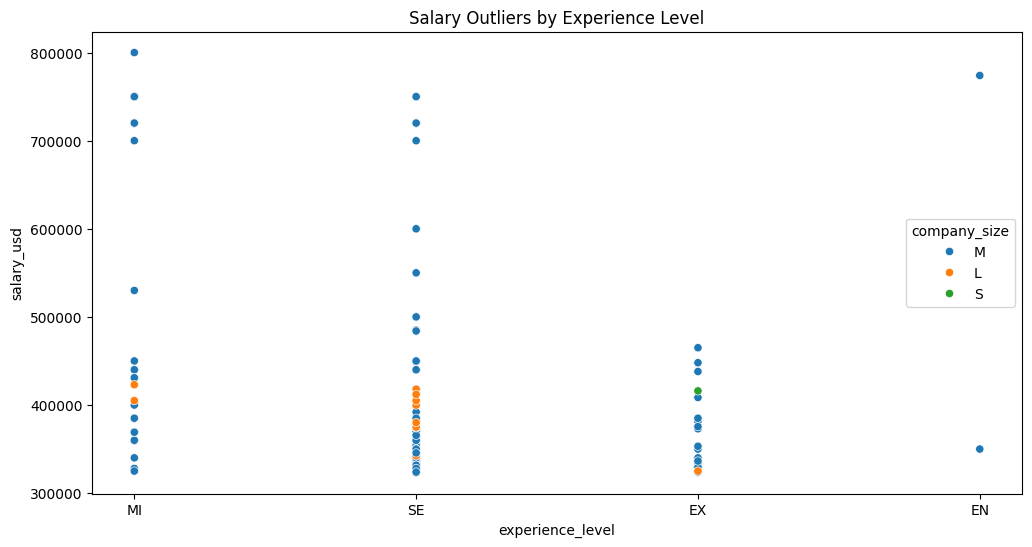

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='experience_level', y='salary_usd', hue='company_size', data=outliers)
plt.title("Salary Outliers by Experience Level")
#plt.yscale('log')

<span style="color: purple">It looks like the highest outliers belong to the mid-level engineers which seems highly unlikely, especially for medium-sized companies. One even belongs to an entry-level engineer which must be an error. Many do belong to senior engineers, but few belong to executives. It is probably best to remove the outliers.

In [36]:
df = df[(df['salary_usd'] >= lower_bound) & (df['salary_usd'] <= upper_bound)].copy()
df.shape

(9938, 9)

#### <span style="color: hotpink">**Average Salary by Employment Type and Experience Level**

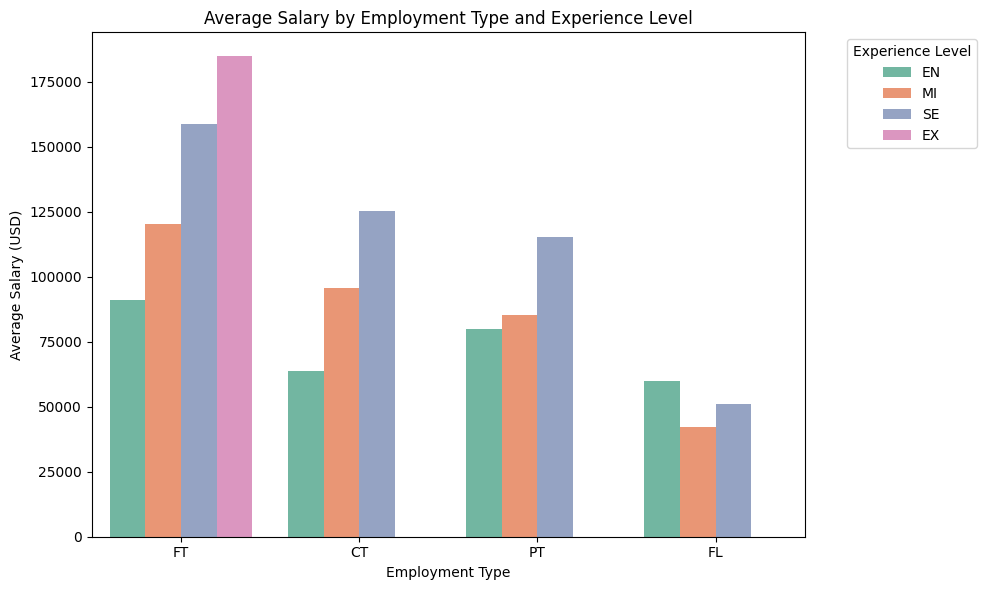

In [38]:
df['experience_level'] = pd.Categorical(
    df['experience_level'],
    categories=['EN', 'MI', 'SE', 'EX'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='employment_type',
    y='salary_usd',
    hue='experience_level',
    palette='Set2',
    estimator='mean',
    errorbar=None
)
plt.title('Average Salary by Employment Type and Experience Level')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<span style="color: purple">Based on this visualization we can confirm that EX probably does mean Executive-Level Engineer as the average salary is highest for this class and the position only exists in full-time roles. As expected, salaries increased with level of experience, so this feature is important for predicting salaries. There is some more variation for EN and MI level engineers. This could be explained by the actual job title, location, or company size. Employment type may also be an important factor because there is a general pattern in salary with level of commitment to the company.

#### <span style="color: hotpink">**Remote Work Distribution by Year**

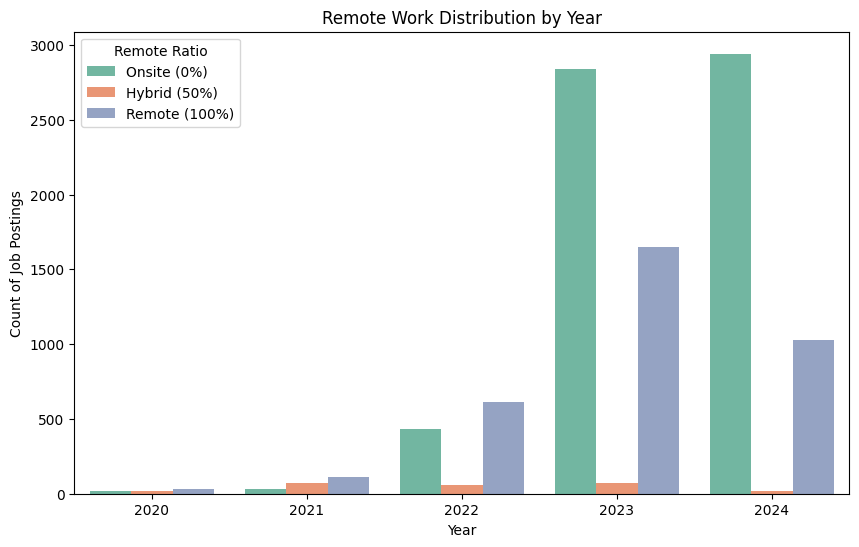

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='work_year',
    hue='remote_ratio',
    palette='Set2',
    order=sorted(df['work_year'].unique())
)
plt.title('Remote Work Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count of Job Postings')
plt.legend(title='Remote Ratio', labels=['Onsite (0%)', 'Hybrid (50%)', 'Remote (100%)'])
plt.show()

<span style="color: purple">As expected, we have very little data for 2020-2022. Most of the data we do have is for onsite and remote types. From what I hear, it seems like more and more jobs are hybrid or remote these days, so I'm assuming this dataset just doesn't have that data. The model won't be great for predicting salaries of different hybrid jobs but it will perform well for onsite jobs.

#### <span style="color: hotpink">**Average Salary by Remote Work Ratio and Year**

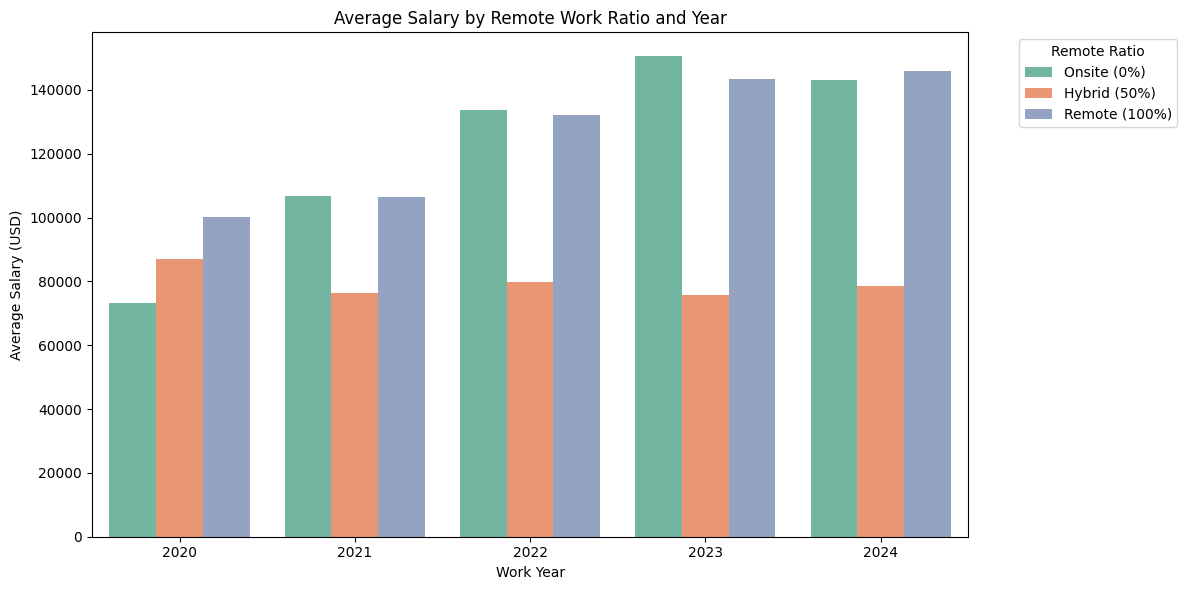

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='work_year',
    y='salary_usd',
    hue='remote_ratio',
    palette='Set2',
    estimator='mean',
    errorbar=None
)
plt.title('Average Salary by Remote Work Ratio and Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Remote Ratio', bbox_to_anchor=(1.05, 1), labels=['Onsite (0%)', 'Hybrid (50%)', 'Remote (100%)'])
plt.tight_layout()
plt.show()

<span style="color: purple">It looks like there is very little change in salaries for hybrid jobs, and this may be because we're lacking enough data. Remote job salaries seem to be increasing since 2020, and it's interesting that this trend is clear with the little data we have. Onsite job salaries have nearly doubled since 2020, but there is a slight decrease from 2023 to 2024. I wonder if this has anything to do with the pandemic, as less people are as willing to work fully on location. Maybe they are being offered more money to work fully onsite. Remote and hybrid workers made more money in 2020 but were surpassed by onsite workers in 2021. Onsite and remote workers now make about the same.

#### <span style="color: hotpink">**Salary Distribution by Company Location**

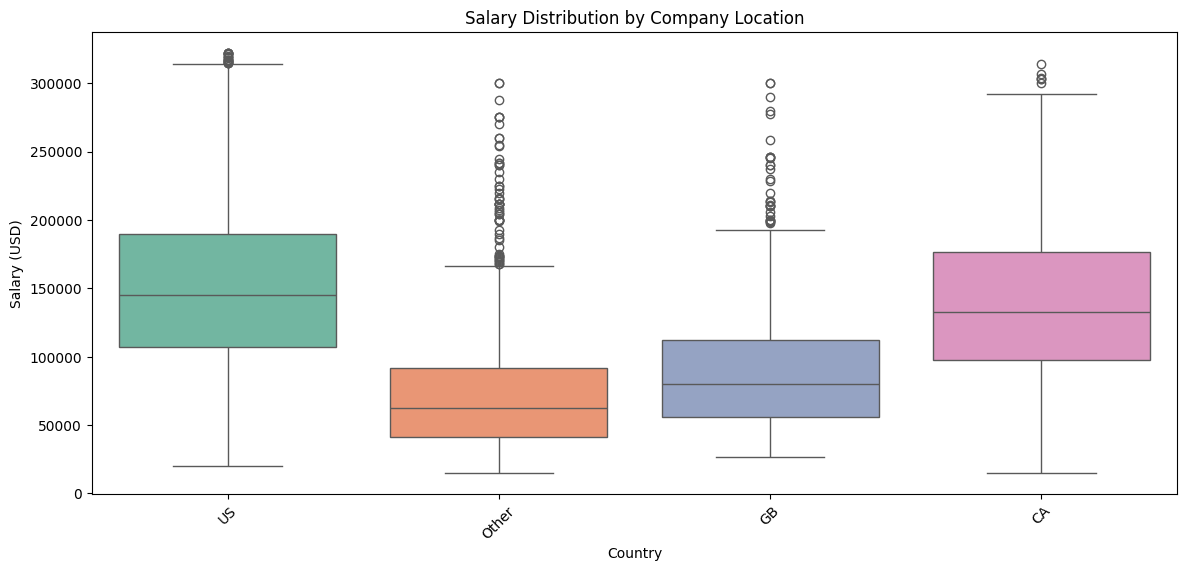

In [47]:
top_locations = df['company_location'].value_counts().head(10).index
filtered_df = df[df['company_location'].isin(top_locations)]

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=filtered_df,
    x='company_location',
    y='salary_usd',
    order=top_locations,
    palette='Set2',
    hue='company_location',
    legend=False
)
plt.title('Salary Distribution by Company Location')
plt.xlabel('Country')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

<span style="color: purple">The US and Canada have the highest salaries. This may not be entirely accurate because we have the most data on these two countries, but other countries with prominent tech industries may pay just as much. The 'Other' class includes 74 other countries, and while the average is much lower than the top 3 countries, there are a significant outliers.

## <span style="color: hotpink">Encoding and Scaling

<span style="color: purple">I will now encode my features to make them interpretable for my linear regression models. I am replacing the ordinal values with integers (i.e., experience_level, employment_type, etc.), scaling down the original numerical values (remote_ratio and work_year), and getting dummies for the nominal values (countries). After this, all the features will be within a scale of 0-4. The only feature I will not be touching yet is job_title because it is too complicated and I want to start with a simpler model.

In [51]:
exp_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
emp_map = {'FL': 1, 'PT': 2, 'CT': 3, 'FT': 4}
size_map = {'S': 1, 'M': 2, 'L': 3}

df_encoded = df.copy() 

df_encoded['experience_level'] = df_encoded['experience_level'].map(exp_map)
df_encoded['employment_type'] = df_encoded['employment_type'].map(emp_map)
df_encoded['company_size'] = df_encoded['company_size'].map(size_map)

df_encoded['work_year'] = df_encoded['work_year'] - 2020
df_encoded['remote_ratio'] = df_encoded['remote_ratio'] / 100

df_encoded = pd.get_dummies(df_encoded, columns=['company_location', 'employee_residence'], drop_first=False, dtype=int)

df_encoded = df_encoded.drop(columns=['company_location_Other', 'employee_residence_Other', 'job_title'])
df_encoded.head()


,work_year,experience_level,employment_type,salary_usd,remote_ratio,company_size,company_location_CA,company_location_GB,company_location_US,employee_residence_CA,employee_residence_GB,employee_residence_US
0,4,3,4,202730,0.0,2,0,0,1,0,0,1
1,4,3,4,92118,0.0,2,0,0,1,0,0,1
2,4,3,4,130500,0.0,2,0,0,1,0,0,1
3,4,3,4,96000,0.0,2,0,0,1,0,0,1
4,4,3,4,190000,0.0,2,0,0,1,0,0,1


In [52]:
df_encoded.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary_usd',
       'remote_ratio', 'company_size', 'company_location_CA',
       'company_location_GB', 'company_location_US', 'employee_residence_CA',
       'employee_residence_GB', 'employee_residence_US'],
      dtype='object')

## <span style="color: hotpink">Experiment 1 
### <span style="color: hotpink">Modeling
<span style="color: purple">For the first experiment, I want to try a linear regression using a few variables that I think are important based on the visualizations I made.

In [54]:
import numpy as np
mean = df_encoded['salary_usd'].mean()

abs_diff_from_mean = abs(df_encoded['salary_usd'] - mean)
baseline_mae = abs_diff_from_mean.mean()

squared_diff_from_mean = (df_encoded['salary_usd'] - mean) ** 2
baseline_mse = squared_diff_from_mean.mean()

baseline_rmse = np.sqrt(baseline_mse)

print(f'Baseline MAE: {baseline_mae}')
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Baseline MAE: 50490.888587163536
Baseline MSE: 3866270650.1955805
Baseline RMSE: 62179.3426323854


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y = df_encoded['salary_usd']
X = df_encoded[['employment_type', 'experience_level', 'company_location_US', 'remote_ratio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(6956, 4) (2982, 4)


In [56]:
lr_01 = LinearRegression().fit(X_train, y_train)

y_pred = lr_01.predict(X_test)

### <span style="color: hotpink">Evaluation

In [58]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_01.coef_
}).sort_values('Coefficient', ascending=False)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Model Evaluation ===")
print("\nFeature Coefficients:")
print(coefficients.to_string(index=False))

print("\nIntercept: %.2f" % lr_01.intercept_)
print()

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.3f}')

=== Model Evaluation ===

Feature Coefficients:
            Feature  Coefficient
company_location_US 46160.836513
   experience_level 32068.506019
    employment_type 12932.546344
       remote_ratio -5478.591660

Intercept: -27561.25

MAE: 43296.94
MSE: 2924374773.82
RMSE: 54077.49
R-squared: 0.245


```
Based on this model evaluation, we can see that companies based on the US are associated with an average salary increase of approximately $46,161 compared to non-US locations, suggesting that US-based companies generally offer higher compensation. Experience level also plays a significant role, with each increase in experience leading to an estimated salary increase of $32,069. Employement type similary impacts salary, with full-time and contract positions earning more than part-time and freelance roles, contributing to an average salary increase of $12,933 for higher employment type values. Ranking these features linearly is likely not representative of their actual values.  
Conversly, remote work ratio negatively affects, salary, where a fully remote job is associated with a reduction of around $5,478 compared to an in-office role.  
Despite these insights, the model's low performance indicates significant room for improvement. The intercept is -$27,561.25, which is unrealistic and suggests that some influential salary factors are missing or that the feature engineering was not appropriate. The R^2 value suggests that the model explains only 24.5% of salary variations, indicating that other critical predictors are missing.
```

---


## <span style="color: hotpink">Experiment 2

In [61]:
import statsmodels.api as sm

X = df_encoded.drop(columns=['salary_usd'])  # Drop target variable
y = df_encoded['salary_usd']

X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()

ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_usd   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     338.5
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:39:16   Log-Likelihood:            -1.2221e+05
No. Observations:                9938   AIC:                         2.444e+05
Df Residuals:                    9926   BIC:                         2.445e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.881e+04   1.31e+04     -2.203      0.028   -5.44e+04   -3178.435
work_year              2732.1465    725.267      3.767      0.000    1310.476    4153.817
experience_level       3.019e+04    752.309     40.128      0.000    2.87e+04    3.17e+04
employment_type        6847.5428   3116.396      2.197      0.028     738.775     1.3e+04
remote_ratio          -3342.8484   1161.635     -2.878      0.004   -5619.888   -1065.809
company_size           2336.0051   1917.628      1.218      0.223   -1422.935    6094.945
company_location_CA   -5869.7069   1.74e+04     -0.338      0.735   -3.99e+04    2.82e+04
company_location_GB   -8136.1482    1.7e+04     -0.479      0.632   -4.15e+04    2.52e+04
company_location_US    1.227e+04   7161.107      1.714      0.087   -1765.332    2.63e+04
employee_residence_CA  5.533e+04   1.73e+04      3.190      0.001    2.13e+04    8.93e+04
employee_residence_GB  1.957e+04    1.7e+04      1.149      0.251   -1.38e+04     5.3e+04
employee_residence_US  5.011e+04   7038.344      7.120      0.000    3.63e+04    6.39e+04
==============================================================================
Omnibus:                      538.844   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.673
Skew:                           0.608   Prob(JB):                    3.06e-137
Kurtosis:                       3.203   Cond. No.                         302.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color: hotpink">Evaluation

```
This model explains 27.3% of the variance in salary, again suggesting that many influential factors are not included or that the encoding is not appropriate. This is not much better than the previous model.  
Experience level plays a major role, with each increase in experience associated with a salary increase of approximately $30,190. Work year also shows a positive trend, with salaries increasing by around $2,732 per year. Employment type significantly impacts salary, where transitioning from part-time or contract work to full-time employment results in an average increase of $6,847. The remote work ratio negatively affects salary, with fully remote positions, earning about $3,342 less than in-office positions, suggesting that remote jobs may generally offer lower compensation. Employee residence is a strong predictor, with US-based employees earning approximately $50,110 more than the baseline group, while employees in Canada see an even higher increase of about $55,330. However, the US employee residence coefficient is not statistically significant.
Some features do not show strong significance in predicting salary. Company size does not have a meaningful impact impact (p=0.223), and company location, does not significantly influence salary. Interestingly, US-based companies have a coefficient of $12,270, which is close to being significant (p=0.087), suggesting a potential but weak effect.  
Overall, experience level, remote ratio, employment type, and employee residence significantly impact salary, while company location and company size have less influence than expected.
```

## <span style="color: hotpink">Experiment 3
For the final experiment, I'm going to include job_title in the model, as it seems the previous models don't have adequate information to predict salary accurately. I am creating 8 categories that encompass the most common and distinct job titles in the dataset: Executive, Data Engineer, Software/ML Engineer, Data Scientist, Data Analyst, Data Architect, Data Manager, and Other. Now that there are 8 categories instead of 155, it makes more sense to use one-hot encoding. This keeps the data within the scale that has already been established and doesn't impose an order on job categories that don't have a clear ranking. I am also going to change the way I encoded the other features. Imposing a ranking on features like experience_level and employment_type seems to not work very well because the model interprets these values as numerical distances. I will instead get dummies for these features. I am also dropping company_location due to multicollinearity.

In [64]:
def map_job_title(title):
    title = title.lower()
    
    if any(x in title for x in ['head', 'principal', 'director']):
        return 'executive'
    elif 'engineer' in title and 'data' in title:
        return 'data engineer'
    elif any(x in title for x in ['ml', 'machine learning', 'engineer', 'developer', 'ai', 'artificial intelligence']):
        return 'software/ml engineer'
    elif 'scientist' in title or 'science' in title:
        return 'data scientist'
    elif 'analyst' in title:
        return 'data analyst'
    elif 'architect' in title:
        return 'data architect'
    elif 'manager' in title:
        return 'data manager'
    else:
        return 'other'

df_dummies = df.copy()

df_dummies = df_dummies.drop(columns=['company_location'])


df_dummies['job_category'] = df_dummies['job_title'].apply(map_job_title)

df_dummies = pd.get_dummies(df_dummies, columns=['job_category', 'experience_level', 
                                                'employment_type', 'employee_residence'], dtype=int)

size_map = {'S':1, 'M':2, 'L':3}
df_dummies['company_size'] = df_dummies['company_size'].map(size_map)

df_dummies['work_year'] = df_dummies['work_year'] - 2020
df_dummies['remote_ratio'] = df_dummies['remote_ratio'] / 100

df_dummies = df_dummies.drop(columns=['job_title', 'job_category_other','employee_residence_Other', 
                                     'experience_level_EN', 'employment_type_FL'])

df_dummies.head()


,work_year,salary_usd,remote_ratio,company_size,job_category_data analyst,job_category_data architect,job_category_data engineer,job_category_data manager,job_category_data scientist,job_category_executive,job_category_software/ml engineer,experience_level_MI,experience_level_SE,experience_level_EX,employment_type_CT,employment_type_FT,employment_type_PT,employee_residence_CA,employee_residence_GB,employee_residence_US
0,4,202730,0.0,2,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,4,92118,0.0,2,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,4,130500,0.0,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,4,96000,0.0,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
4,4,190000,0.0,2,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [65]:
df_dummies.columns

Index(['work_year', 'salary_usd', 'remote_ratio', 'company_size',
       'job_category_data analyst', 'job_category_data architect',
       'job_category_data engineer', 'job_category_data manager',
       'job_category_data scientist', 'job_category_executive',
       'job_category_software/ml engineer', 'experience_level_MI',
       'experience_level_SE', 'experience_level_EX', 'employment_type_CT',
       'employment_type_FT', 'employment_type_PT', 'employee_residence_CA',
       'employee_residence_GB', 'employee_residence_US'],
      dtype='object')

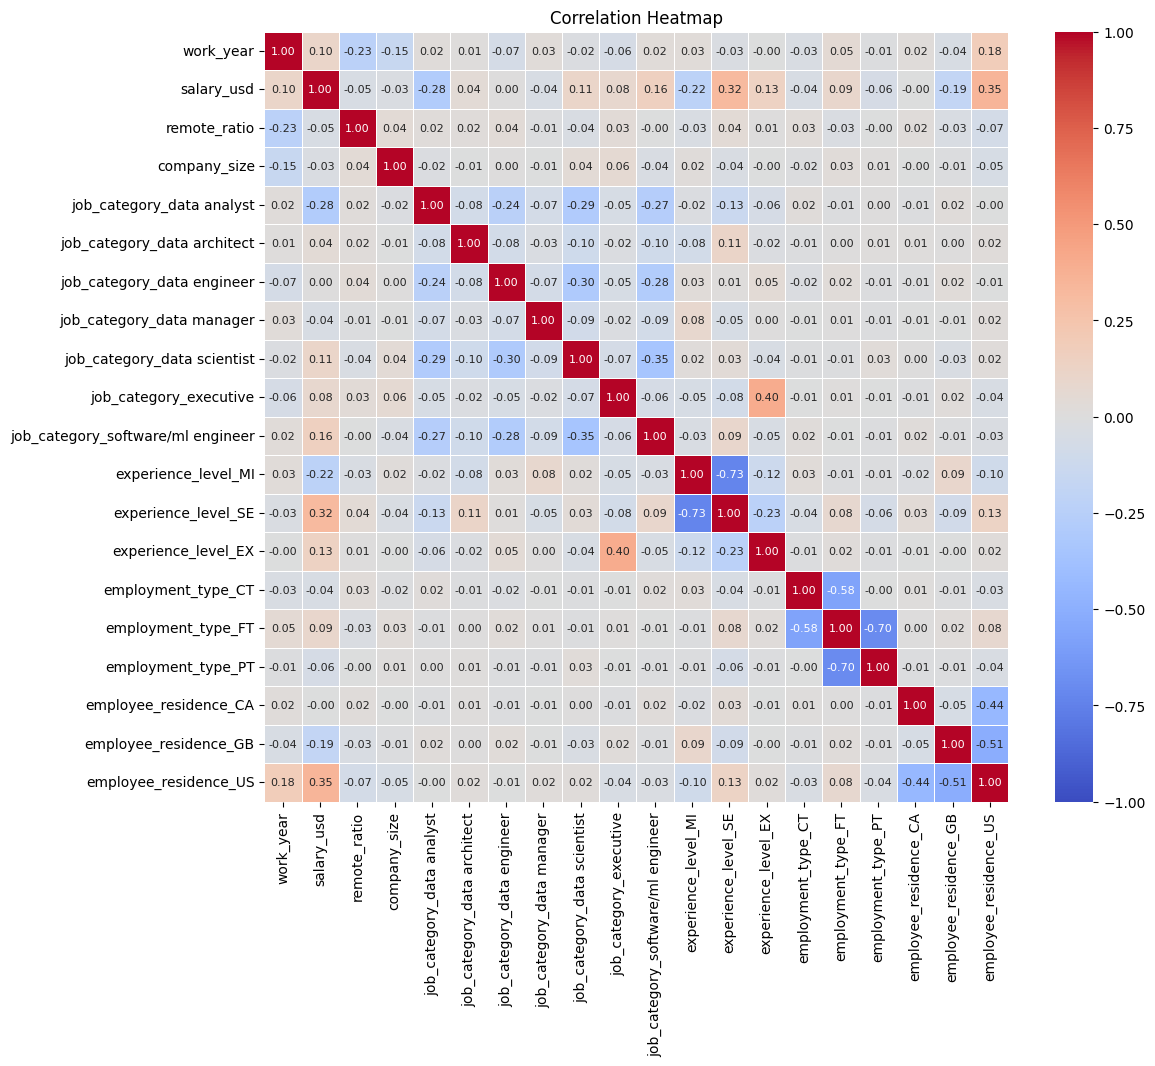

In [66]:
corr_matrix = df_dummies.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size':8}, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
X = df_dummies.drop(columns=['salary_usd']) 
y = df_dummies['salary_usd']

X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:             salary_usd   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     269.9
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:39:17   Log-Likelihood:            -1.2172e+05
No. Observations:                9938   AIC:                         2.435e+05
Df Residuals:                    9918   BIC:                         2.436e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### <span style="color: hotpink">Evaluation

```
The model explains 34.1% of the variance in salary, which suggests that while the model captures some key salary drivers, there is still substantial room for improvement. Among the significant predictors, work year plays an important role, with each additional year increasing salary by approximately $3,365. Job category is another strong determinant of salary, with data engineers earning around $23,880 more than the reference category, data scientists making $34,210 more, and executive seeing the highest increase at $57,850. Experience level also shows a strong correlation with salary, as shown by the highly significant coefficients for mid-level, senior, and executive experience levels. Geographic location is a key factor, with employees residing in the US earning approximately $65,750 more than the baseline group, while those in Canada see an increase of about $52,020.
Some features, however, are either not significant or show only a small impact on salary. The remote work ratio, though statistically significant (p = 0.029), has a relatively small negative effect, with a fully remote role decreasing salary by about $2,420. Meanwhile, company size does not appear to strongly influence salary, as indicated by its non-significant coefficient (p = 0.731). Similarly, employment type variables such as contract and part-time work do not significantly affect salary, suggesting that salary differences across employment types may not be pronounced in this dataset.
Overall, while the model identifies key salary determinants, further refinements are necessary to improve accuracy and explain more of the variation in salaries.
```

## <span style="color: hotpink">Impact
This project provides valuable insights into salary trends and the factors influencing compensation in the data engineering field. By identifying key predictors such as experience level, job title, and geographic location, it can help job seekers make informed career decisions, assist employers in developing competitive salary structures, and support policymakers in understanding wage disparities. However, despite these benefits, the project also carries potential social and ethical implications that should be carefully considered.

One potential concern is the reinforcement of existing salary inequalities. If employers use predictive models like this to benchmark salaries, they may unintentionally perpetuate wage gaps rather than addressing disparities. For instance, if certain demographic factors or biases were present in the underlying dataset, the model could reflect and reinforce these biases rather than challenge them. This could disproportionately affect underrepresented groups in tech, such as women and minority workers, by justifying lower salaries based on historical trends rather than actual skills and contributions.

Additionally, the findings on remote work and salary reductions could have unintended consequences. If employers interpret the data as a justification for paying remote workers less, this may lead to wage suppression for employees who choose flexible work arrangements. Such decisions could disproportionately impact workers in lower-cost-of-living areas or those with caregiving responsibilities, reinforcing existing socioeconomic inequalities.

Ethical considerations also arise in terms of transparency and fairness. If companies leverage salary prediction models in hiring and compensation decisions without disclosing their methodology, employees may face wage determinations based on factors they cannot control. This raises questions about algorithmic transparency and the need for human oversight in salary negotiations.

Finally, while this model provides useful insights, it does not capture all the nuances of salary determination. Factors like negotiation skills, company culture, and industry-specific salary trends are not fully accounted for, which means relying solely on this model for decision-making could lead to oversimplified conclusions. Employers and employees should use these insights as a guide rather than an absolute determinant of fair wages.

Overall, while this project has the potential to bring positive change by increasing salary transparency, it is important to acknowledge and mitigate its ethical and social implications. Responsible use of these findings—along with efforts to address systemic biases in salary structures—can help ensure that salary prediction models contribute to a more equitable workforce rather than reinforcing existing disparities.

---

## <span style="color: hotpink">Conclusion

Through this project, I gained valuable insights into the key factors that influence salaries in data engineering and how different modeling techniques impact predictive performance. One of the most important takeaways was the significance of experience level, job title, and employee residence in determining salary. These features consistently showed strong statistical significance and had the largest effects on salary predictions. Additionally, the data confirmed industry trends, such as the salary premium associated with working in the U.S. and Canada compared to other locations.  

Throughout the modeling process, various preprocessing and feature engineering techniques played a crucial role in improving model performance. Handling categorical variables effectively, particularly by grouping job titles into broader categories, significantly enhanced the predictive power of the model. Additionally, removing multicollinear features like company size helped stabilize coefficient estimates, ensuring that each variable contributed meaningful information.  

Feature selection proved to be another valuable experiment. While some initially included features, such as company size and company location, were expected to be strong predictors, they turned out to have minimal impact on salary predictions. Conversely, employee residence had a much greater effect than company location, suggesting that salaries are more influenced by where an employee lives rather than where their employer is based. This finding aligns with the growing trend of remote work, where companies may adjust salaries based on the cost of living.  

Despite these improvements, the model still has limitations. The best-performing linear regression model only explained about 34% of salary variation, indicating that other important salary factors—such as skills, industry, and individual company policies—are missing from the dataset. Exploring non-linear models like Random Forests or Gradient Boosting could potentially capture more complex relationships and further improve predictive accuracy. Additionally, incorporating interaction terms, such as experience level combined with job title, might better capture salary dynamics across different roles.  

Overall, this project reinforced the importance of careful data preprocessing, feature selection, and model evaluation. While the results provide useful insights into salary trends, they also highlight the complexity of wage determination and the need for further refinement in predictive modeling. Future work could focus on integrating additional salary-related factors, experimenting with advanced machine learning techniques, and addressing biases to ensure fair and reliable predictions.

---

## <span style="color: hotpink">References
1. ChatGPT for debugging and LaTeX.